In [ ]:
self.input_layer = nn.Linear(1, 3)
self.output_layer = nn.Linear(3, 1)

In [ ]:
self.input_layer = nn.Linear(1, 3)
ReLU()
self.output_layer = nn.Linear(3, 3)







ReLU()
self.output_layer = nn.Linear(1, 3)

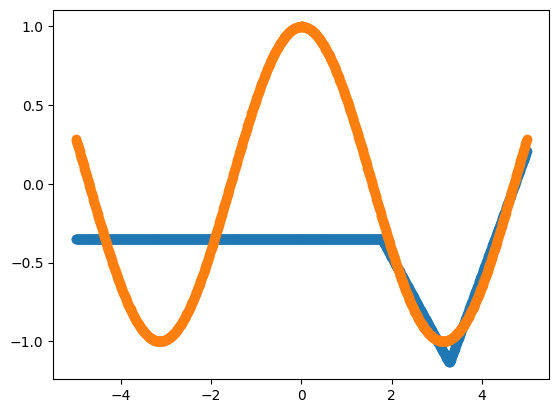

In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import numpy as np


class MLP(nn.Module):
    def __init__(self, hidden_dim=2):
        super().__init__()
        self.input_layer = nn.Linear(1, hidden_dim)
        self.activation = nn.ReLU()
        self.output_layer = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = self.input_layer(x)
        x = self.activation(x)
        return self.output_layer(x)

def snake(x, alpha):
    return x + (alpha + 1e-9).reciprocal() * torch.sin(alpha * x).pow(2)

class MultiSnake(nn.Module):
    def __init__(self, n_channels):
        super().__init__()
        self.alpha = nn.Parameter(torch.ones(n_channels))
    def forward(self, x):
        return snake(x, self.alpha)
    

class SingleSnake(nn.Module):
    def __init__(self):
        super().__init__()
        self.alpha = nn.Parameter(torch.ones(1))
    def forward(self, x):
        return snake(x, self.alpha)




# Dataset and Network
n_examples = 1000
test_range_start = int(n_examples*0.4)
test_range_end =int(n_examples*0.6)


x = torch.linspace(-5, 5, n_examples).reshape(-1,1).cuda()
y = torch.cos(x)# + torch.cos(5*x)
net = MLP().cuda()

# Train and Test Sets
train_indices = list(range(0,test_range_start)) + list(range(test_range_end,n_examples))
test_indices = list(range(test_range_start,test_range_end))
x_train = x[train_indices]
y_train = y[train_indices]
x_test = x[test_indices]
y_test = y[test_indices]

# Loss and optimizer
loss_fcn = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
batch_size = 128

for epoch in range(1000):

    n_data = len(x_train)
    indices = np.arange(n_data)
    np.random.shuffle(indices)
    num_iters = int(n_data/batch_size)

    for i in range(num_iters):
        batch_indices = indices[i*batch_size:(i+1)*batch_size]
        batch_x = x_train[batch_indices]
        batch_y = y_train[batch_indices]
        pred = net(batch_x)
        loss = loss_fcn(pred, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
predictions = net(x).detach().cpu().numpy()
plt.scatter(x.cpu().numpy(), predictions)
plt.scatter(x.cpu().numpy(), y.cpu().numpy())

plt.plot(x.cpu(), net.net.input_layer(x).detach().cpu().numpy())

In [16]:
net.output_layer.weight.shape

torch.Size([1, 64])

In [38]:
densities = torch.softmax(net.output_layer.weight[0]*15, dim=-1)

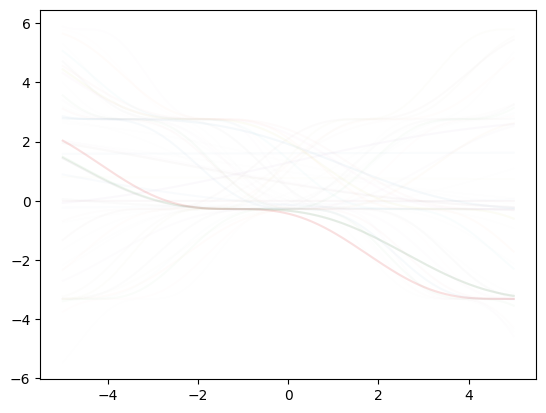

In [39]:
for i in range(64):
    density = densities[i].item()
    plt.plot(x.cpu(), net.activation(net.input_layer(x)).detach().cpu().numpy()[:,i], alpha=density)

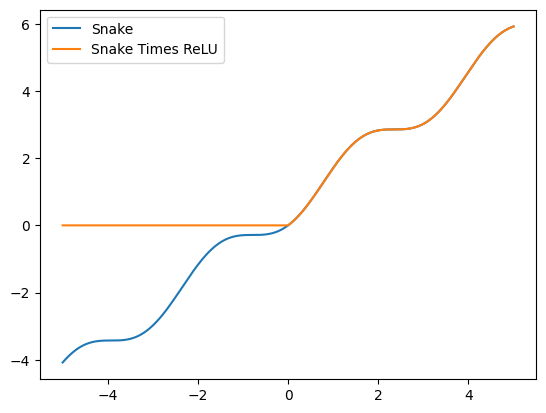

In [59]:
plt.plot(x.cpu(), snake(x, torch.tensor(1)).cpu(), label='Snake')
plt.plot(x.cpu(), torch.max(torch.tensor(0),snake(x, torch.tensor(1)).cpu()), label='Snake Times ReLU')
plt.legend()